In [1]:

import importlib
import ifimage_tools
importlib.reload(ifimage_tools)
import pandas as pd
import warnings
import pickle

import os
import numpy as np
from stardist.matching import matching
import os
import numpy as np
from stardist.matching import matching
image_dir = "Reorgnized Ground Truth"
masks_dir = "merged_mask"
dataset = ifimage_tools.IfImageDataset(image_dir, masks_dir,"/home/liy121/ifimage/cell_masks", {})
dataset.load_data()
old_version_sample_ids = ["6390", "8408", "8406", "8405v2", "8405", "8407"]
for sample_id in old_version_sample_ids:
    if sample_id in dataset.samples:
        del dataset.samples[sample_id]



Welcome to CellposeSAM, cellpose v
cellpose version: 	4.0.4 
platform:       	linux 
python version: 	3.10.16 
torch version:  	2.7.0+cu126! The neural network component of
CPSAM is much larger than in previous versions and CPU excution is slow. 
We encourage users to use GPU/MPS if available. 




2025-06-09 08:30:22.395670: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-09 08:30:22.444318: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-09 08:30:24.078276: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
auto.py (21): IProgress not found. Please update jupyter and ipywidgets. See htt

In [2]:
# Assume `dataset` is an instance of YourDatasetClass
df_nuc   = dataset.evaluate_nuclei()
# df_cells = dataset.evaluate_cell()

# Quick peek
print(df_nuc.head())
# print(df_cells.head())

nuclei eval:   8%|▊         | 8/100 [00:30<05:27,  3.56s/it]

matching() error [15972/cyto/0.5]: y_true ((1024, 1388)) and y_pred ((1040, 1388)) have different shapes
matching() error [15972/cyto/0.55]: y_true ((1024, 1388)) and y_pred ((1040, 1388)) have different shapes
matching() error [15972/cyto/0.6000000000000001]: y_true ((1024, 1388)) and y_pred ((1040, 1388)) have different shapes
matching() error [15972/cyto/0.6500000000000001]: y_true ((1024, 1388)) and y_pred ((1040, 1388)) have different shapes
matching() error [15972/cyto/0.7000000000000002]: y_true ((1024, 1388)) and y_pred ((1040, 1388)) have different shapes
matching() error [15972/cyto/0.7500000000000002]: y_true ((1024, 1388)) and y_pred ((1040, 1388)) have different shapes
matching() error [15972/cyto/0.8000000000000003]: y_true ((1024, 1388)) and y_pred ((1040, 1388)) have different shapes
matching() error [15972/cyto/0.8500000000000003]: y_true ((1024, 1388)) and y_pred ((1040, 1388)) have different shapes
matching() error [15972/cyto/0.9000000000000004]: y_true ((1024, 1388

nuclei eval:  39%|███▉      | 39/100 [02:17<03:36,  3.55s/it]

[8550] lacks GT nuclei; skipping…
[8917] lacks GT nuclei; skipping…
[5191] lacks GT nuclei; skipping…
[6833] lacks GT nuclei; skipping…
[10166] lacks GT nuclei; skipping…
[9106] lacks GT nuclei; skipping…
[4642] lacks GT nuclei; skipping…
[5792] lacks GT nuclei; skipping…
[10061] lacks GT nuclei; skipping…
[1110] lacks GT nuclei; skipping…
[7925] lacks GT nuclei; skipping…
[5863] lacks GT nuclei; skipping…
[1112] lacks GT nuclei; skipping…
[7739] lacks GT nuclei; skipping…
[5059] lacks GT nuclei; skipping…
[7113] lacks GT nuclei; skipping…
[3569] lacks GT nuclei; skipping…
[7685] lacks GT nuclei; skipping…
[8224] lacks GT nuclei; skipping…
[4515] lacks GT nuclei; skipping…
[7870] lacks GT nuclei; skipping…
[6790] lacks GT nuclei; skipping…
[7962] lacks GT nuclei; skipping…
[1111] lacks GT nuclei; skipping…
[8746] lacks GT nuclei; skipping…
[3532] lacks GT nuclei; skipping…
[3999] lacks GT nuclei; skipping…
[3527] lacks GT nuclei; skipping…
[7071] lacks GT nuclei; skipping…
[5923] lacks

nuclei eval: 100%|██████████| 100/100 [02:21<00:00,  1.42s/it]

[6523] lacks GT nuclei; skipping…
[6466] lacks GT nuclei; skipping…
[4683] lacks GT nuclei; skipping…
[4319] lacks GT nuclei; skipping…
[1109] lacks GT nuclei; skipping…
  sample_id celltype method   iou  precision
0      5803     gfap   cyto  0.50   0.600337
1      5803     gfap   cyto  0.55   0.504216
2      5803     gfap   cyto  0.60   0.392917
3      5803     gfap   cyto  0.65   0.279933
4      5803     gfap   cyto  0.70   0.170320


In [14]:
def plot_precision_by_celltype(df,
                               legend_mapping=None,
                               title="Precision vs. IoU by Cell Type and Method"):
    """
    Plot precision vs. IoU for each method, with separate subplots per celltype.

    Parameters
    ----------
    df : pd.DataFrame
        Must have columns ['sample_id', 'celltype', 'method', 'iou', 'precision'].
    legend_mapping : dict or None
        Optional pretty-name mapping for each method.
    title : str
        Main figure title.
    """
    import matplotlib.pyplot as plt

    legend_mapping = legend_mapping or {}

    # Get sorted list of unique cell types
    celltypes = sorted(df['celltype'].unique())
    n = len(celltypes)
    # Layout: up to 3 columns
    ncols = min(3, n)
    nrows = (n + ncols - 1) // ncols

    # Create figure + axes grid
    fig, axes = plt.subplots(nrows, ncols,
                             figsize=(ncols * 4, nrows * 3),
                             sharey=True)
    axes = axes.flatten()

    # Plot each cell type in its own subplot
    for idx, celltype in enumerate(celltypes):
        ax = axes[idx]
        subset = df[df['celltype'] == celltype]
        # Compute mean precision per method & IoU
        pivot = (subset
                 .groupby(['method', 'iou'])['precision']
                 .mean()
                 .reset_index())
        for method, sub in pivot.groupby('method'):
            sub = sub.sort_values('iou')
            mAP = sub['precision'].mean()
            pretty = legend_mapping.get(method, method)
            label = f"{pretty} (mAP={mAP:.2f})"
            ax.plot(sub['iou'],
                    sub['precision'],
                    marker="o",
                    linestyle="-",
                    label=label)
        ax.set_title(celltype)
        ax.set_xlabel('IoU Threshold')
        if idx % ncols == 0:
            ax.set_ylabel('Precision')
        ax.legend(fontsize='small', loc='best')

    # Remove any unused subplots
    for j in range(n, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(title)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    return fig, axes

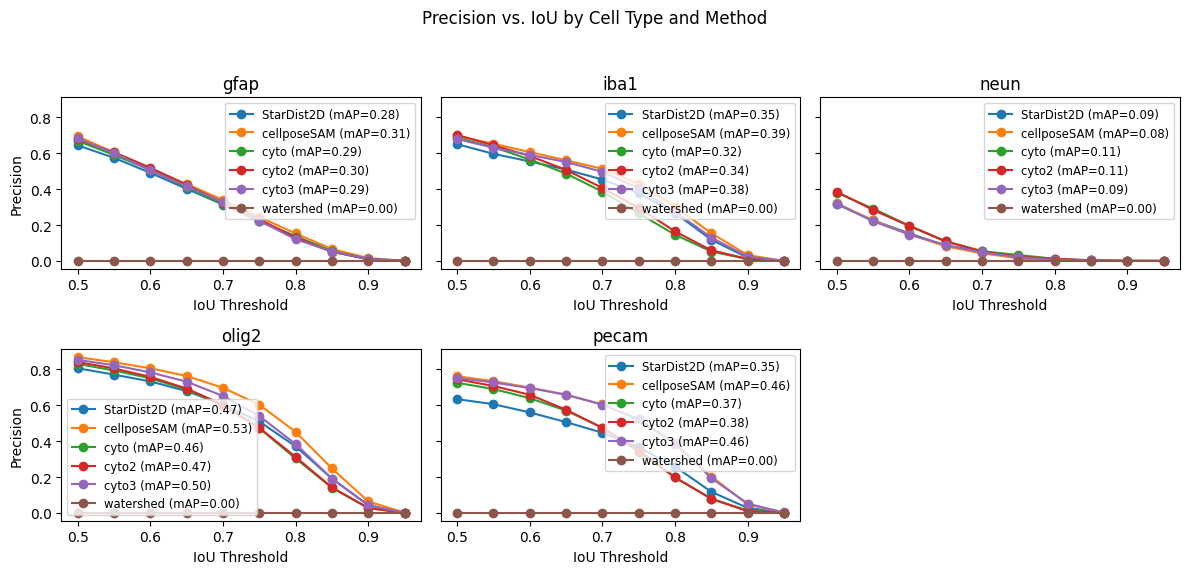

In [16]:
# Overall across all samples:
#fig1, ax1 = plot_precision_iou(df_nuc)
#plt.show()

# By cell type (five subplots if you have five celltypes):
fig2, axes2 = plot_precision_by_celltype(df_nuc)
plt.show()